 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
whalepath = Path("../Starter_Code/whale_returns.csv")

In [3]:
whale_data=pd.read_csv (whalepath, index_col = "Date",parse_dates=True,infer_datetime_format=True)
whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_data=whale_data.dropna().copy()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algopath = Path("../Starter_Code/algo_returns.csv")
algo_data=pd.read_csv (algopath, index_col = "Date", parse_dates=True, infer_datetime_format=True)
algo_data

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_data = algo_data.dropna().copy()
algo_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsxpath = Path("../Starter_Code/sp_tsx_history.csv")
sp_tsx_data = pd.read_csv(sp_tsxpath, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp_tsx_data

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [10]:
# Check Data Types
sp_tsx_data.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_data["Close"]=sp_tsx_data["Close"].str.replace("$"," ")
sp_tsx_data

<ipython-input-11-f7720f802e19>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_data["Close"]=sp_tsx_data["Close"].str.replace("$"," ")


,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"
...,...
2019-12-20,"17,118.44"
2019-12-23,"17,128.71"
2019-12-24,"17,180.15"


In [12]:
sp_tsx_data.dtypes

Close    object
dtype: object

In [13]:
sp_tsx_data["Close"]=sp_tsx_data["Close"].str.replace(',','')
sp_tsx_data

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [14]:
sp_tsx_data['Close']=sp_tsx_data['Close'].astype('float')

In [15]:
sp_tsx_data.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_data.pct_change()

In [17]:
# Drop nulls
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna().copy()
sp_tsx_daily_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns={"Close":"sp_tsx_pct"})
sp_tsx_daily_returns

,sp_tsx_pct
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_data= pd.concat([whale_data, algo_data, sp_tsx_daily_returns], axis = "columns", join = "inner")
all_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_pct
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

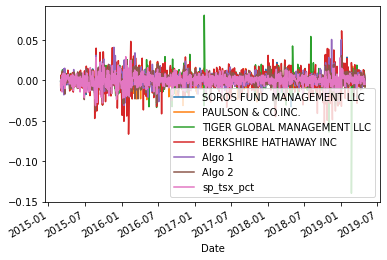

In [20]:
# Plot daily returns of all portfolios
all_data.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

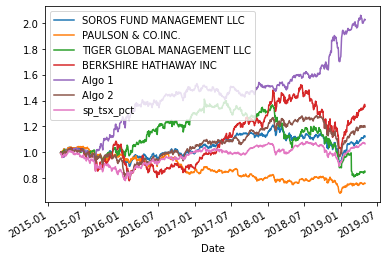

In [21]:
# Calculate cumulative returns of all portfolios
cummulative_returns=(1+all_data).cumprod()
cummulative_returns
# Plot cumulative returns
cummulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

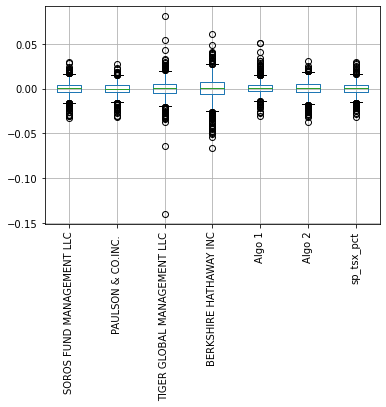

In [22]:
# Box plot to visually show risk
all_data.boxplot(rot=90)

### Calculate Standard Deviations

<AxesSubplot:>

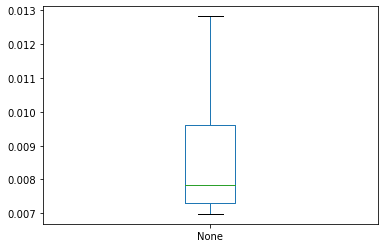

In [23]:
# Calculate the daily standard deviations of all portfolios
all_std = all_data.std()
all_std.plot.box()

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = sp_tsx_daily_returns.std()
sp_tsx_std

sp_tsx_pct    0.006637
dtype: float64

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
all_std_annual =all_std*np.sqrt(252)
all_std_annual

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_tsx_pct                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

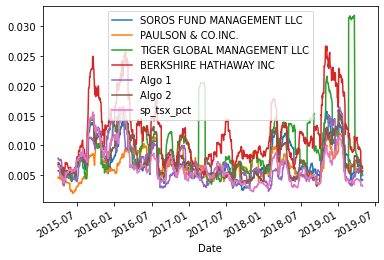

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_data.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
correlation_df = all_data.corr()
# Display de correlation matrix
correlation_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_pct
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
sp_tsx_pct,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [28]:
# Calculate covariance of a single portfolio
covariance_port = all_data["Algo 1"].cov(all_data['sp_tsx_pct'])
covariance_port

1.6563000308911385e-05

In [29]:
# Calculate variance of S&P TSX
variance_sp = all_data['sp_tsx_pct'].var()
variance_sp

4.9479515915131015e-05

In [30]:
# Computing beta
Beta_port = covariance_port/variance_sp
Beta_port

0.3347445908185686

<AxesSubplot:title={'center':'Rolling 21 day Beta'}, xlabel='Date'>

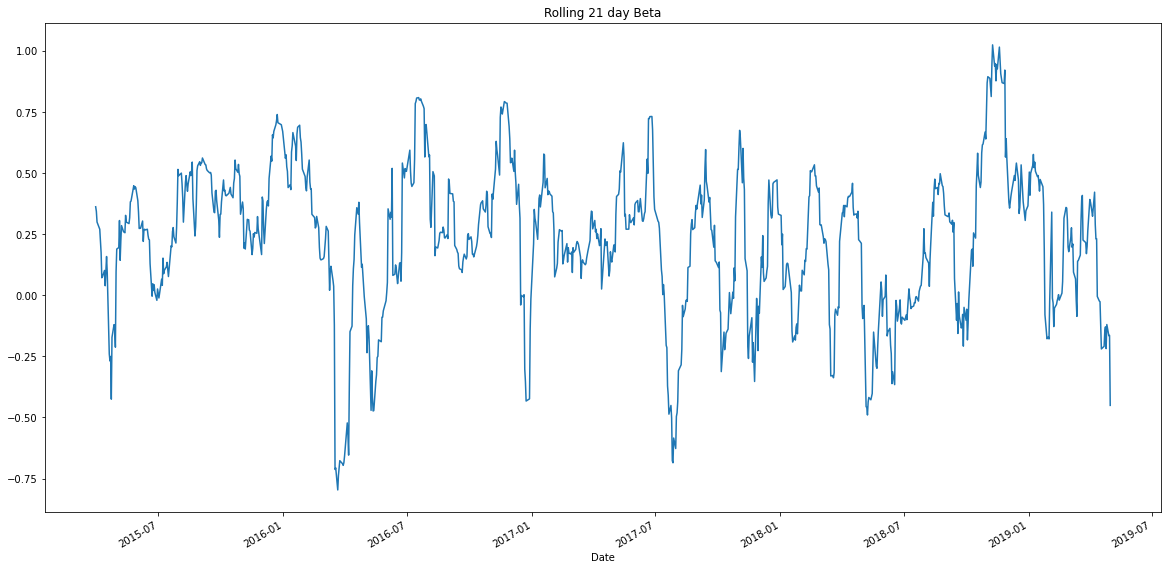

In [31]:
# Plot beta trend
rolling_var = all_data['sp_tsx_pct'].rolling(window=21).var()
rolling_cov = all_data['Algo 1'].rolling(window=21).cov(all_data['sp_tsx_pct'])
rolling_beta = rolling_cov/rolling_var
rolling_beta.plot(figsize=(20,10), title = 'Rolling 21 day Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exp Weighted Moving Average'}, xlabel='Date'>

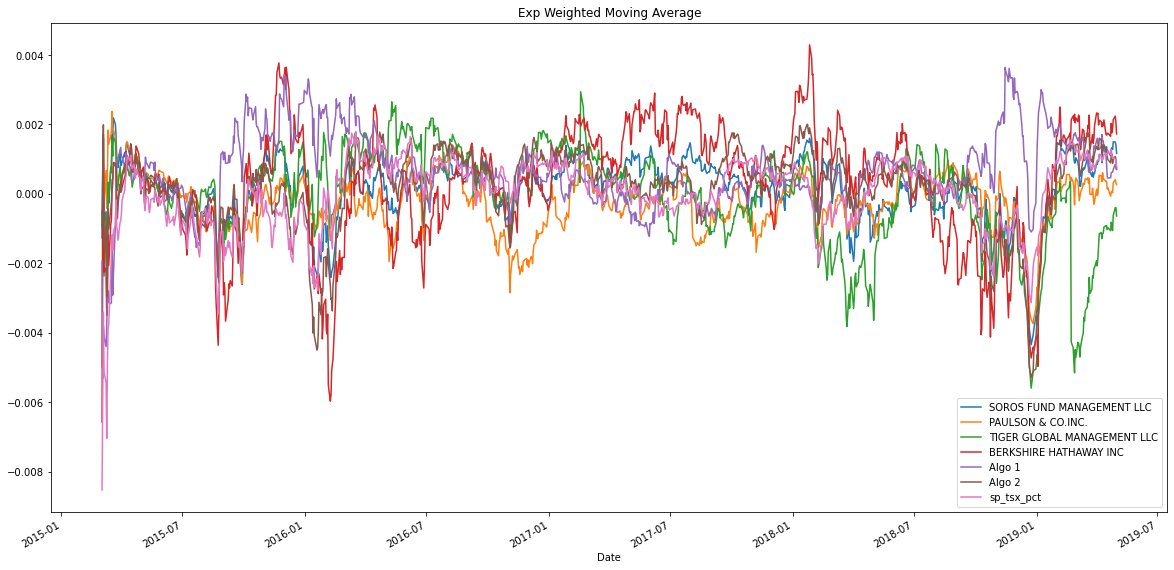

In [32]:
# Use `ewm` to calculate the rolling window
rolling_ewm = all_data.ewm(halflife = 21).mean()
rolling_ewm.plot(figsize=(20,10), title = 'Exp Weighted Moving Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
Sharpe_ratios = ((all_data.mean())*252)/(all_std*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

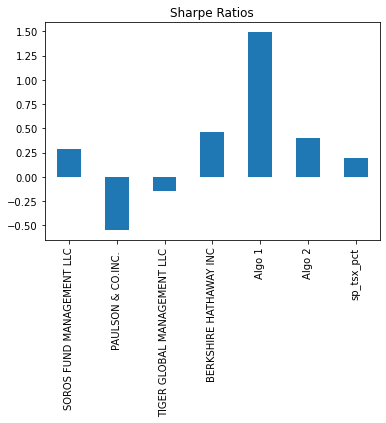

In [34]:
# Visualize the sharpe ratios as a bar plot
Sharpe_ratios.plot(kind = "bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

#Yes the Algo strategies outperformed the market and the S&P index in terms of risk adjusted returns as shown in the above Sharpe ratio graph. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [35]:
# Reading data from 1st stock
Shopify_path = Path("../Starter_Code/shop_historical.csv")
Shopify_csv =pd.read_csv(Shopify_path, parse_dates = True, index_col="Date")
Shopify_csv = Shopify_csv.sort_index()
Shopify_csv.head()
columns = ['Symbol','Shop_close']
Shopify_csv.columns = columns
Shopify_csv.head()

,Symbol,Shop_close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [36]:
# Reading data from 2nd stock
Otex_path = Path("../Starter_Code/otex_historical.csv")
Otex_csv =pd.read_csv(Otex_path, parse_dates = True, index_col="Date")
Otex_csv = Otex_csv.sort_index()
Otex_csv.head()
columns = ['Symbol','Otex_close']
Otex_csv.columns = columns
Otex_csv.head()

,Symbol,Otex_close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [37]:
# Reading data from 3rd stock
L_path = Path("../Starter_Code/l_historical.csv")
l_csv =pd.read_csv(L_path, parse_dates = True, index_col="Date")
l_csv = l_csv.sort_index()
l_csv.head()
columns = ['Symbol','l_close']
l_csv.columns = columns
l_csv.head()

,Symbol,l_close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [38]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([Shopify_csv, Otex_csv, l_csv], axis = 'columns', join = "inner")
combined_df

,Symbol,Shop_close,Symbol,Otex_close,Symbol,l_close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...
2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67


In [39]:
# Reorganize portfolio data by having a column per symbol
combined_df = combined_df.drop(columns = ["Symbol"])
combined_df.head()

,Shop_close,Otex_close,l_close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [40]:
# Calculate daily returns
combined_returns = combined_df.pct_change().dropna().copy()
combined_returns.head()
# Drop NAs

# Display sample data


,Shop_close,Otex_close,l_close
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns =combined_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
Combined_portfolio =pd.concat([portfolio_returns, all_data], axis = "columns", join = "inner")
Combined_portfolio.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_pct
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [50]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Combined_portfolio= Combined_portfolio.dropna().copy()
Combined_portfolio.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_pct
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
portfolio_std = portfolio_returns.std()
annualized_std = portfolio_std*np.sqrt(252)
annualized_std

0.21679368071345856

### Calculate and plot rolling `std` with 21-day window

[]

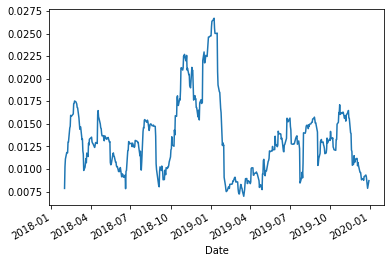

In [55]:
# Calculate rolling standard deviation
rolling_std = portfolio_returns.rolling(window =21).std().plot()
# Plot rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

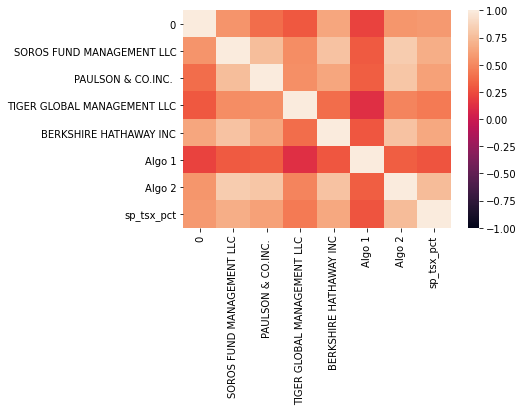

In [62]:
# Calculate and plot the correlation
Portfolio_corr =Combined_portfolio.corr()
import seaborn as sns
sns.heatmap(Portfolio_corr, vmin =-1, vmax = 1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [73]:
# Calculate and plot Beta
Port_cov = Combined_portfolio[0].cov(Combined_portfolio['sp_tsx_pct'])
Beta_Port0 = Port_cov/variance_sp
Beta_Port0

1.0330144435926842

<AxesSubplot:title={'center':'60 day Rolling Portfolio Beta'}, xlabel='Date'>

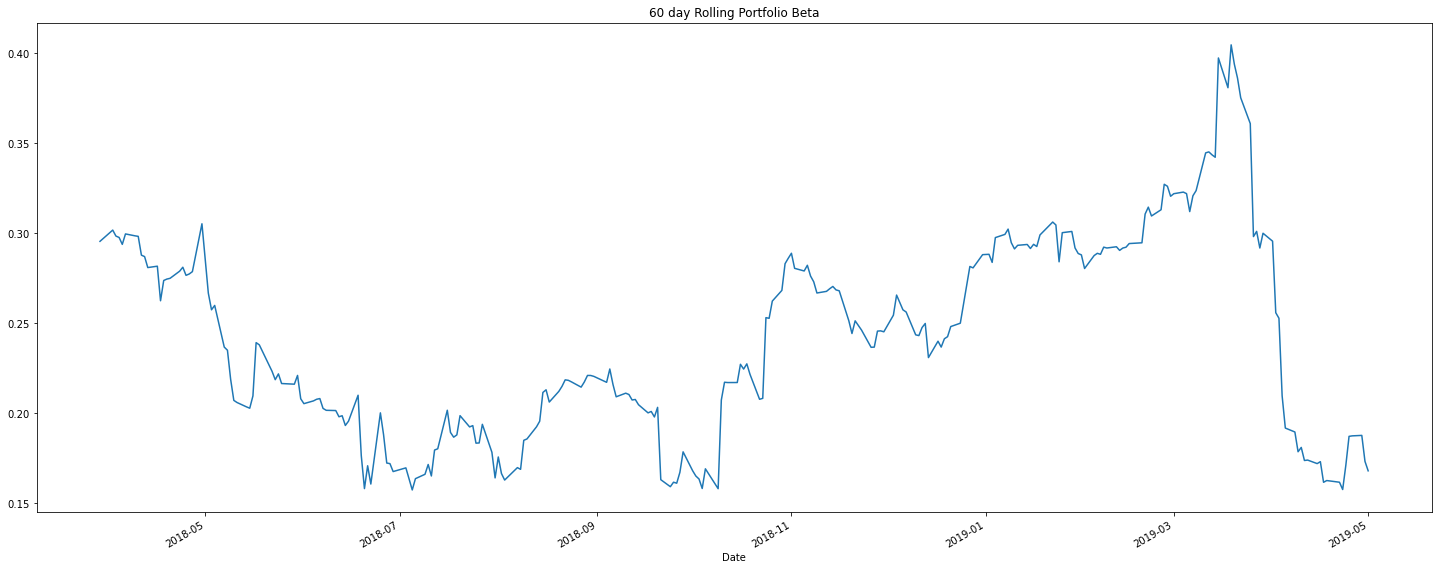

In [77]:
rolling_port_cov = Combined_portfolio[0].rolling(window=60).cov(Combined_portfolio['sp_tsx_pct'])
rolling_sp_var = Combined_portfolio[0].rolling(window =60).var()
rolling_port_beta = rolling_port_cov/rolling_sp_var
rolling_port_beta.plot(figsize=(25,10), title = '60 day Rolling Portfolio Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [78]:
# Calculate Annualzied Sharpe Ratios
Sharpe_ratio_port =((Combined_portfolio).mean()*252)/(Combined_portfolio.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Portfolio Sharpe Ratio'}>

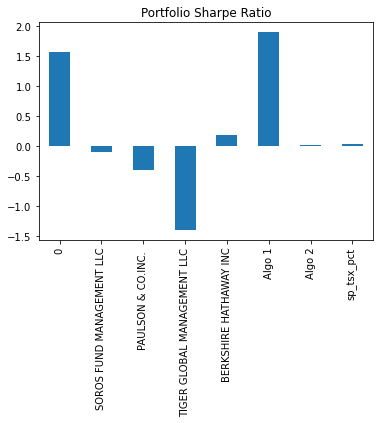

In [79]:
# Visualize the sharpe ratios as a bar plot
Sharpe_ratio_port.plot(kind = 'bar', title = 'Portfolio Sharpe Ratio')

### How does your portfolio do?

Write your answer here!

In [ ]:
#Good, but not as well as Algo 1 in terms of risk adjusted return